# This notebook is ready for your projects and experiments

Go ahead and code!

In [59]:
%config IPCompleter.greedy=True
import pandas as pd

data = pd.read_csv('happyscore_income.csv')

In [2]:
data.sort_values('avg_income', inplace=True) # if True, the data itself is going to be affected, not getting just a copy.

richest = data[ data['avg_income'] >15000 ] #filter

In [3]:
richest.iloc[0] #the country with the lowest income of the richest, the 0 index represent the first element.

country                             Italy
adjusted_satisfaction                  57
avg_satisfaction                      6.6
std_satisfaction                     1.81
avg_income                        15437.6
median_income                     13163.1
income_inequality                 34.1262
region                   'Western Europe'
happyScore                          5.948
GDP                               1.25114
country.1                           Italy
Name: 49, dtype: object

# iloc
DataFrame.iloc <br>
The iloc property is purely integer-location based indexing for selection by position.

In [4]:
richest.iloc[-1] #the country with the higher income of the richest, the -1 index represent the last element of an array.

country                        Luxembourg
adjusted_satisfaction                  66
avg_satisfaction                      7.7
std_satisfaction                     1.76
avg_income                        26182.3
median_income                     22240.2
income_inequality                   31.95
region                   'Western Europe'
happyScore                          6.946
GDP                               1.56391
country.1                      Luxembourg
Name: 61, dtype: object

In [5]:
richest.iloc[0:3]

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
49,Italy,57.0,6.6,1.81,15437.595,13163.070,34.12625,'Western Europe',5.948,1.25114,Italy
44,Ireland,64.0,7.5,1.85,16657.770,13823.160,32.41875,'Western Europe',6.940,1.33596,Ireland
90,Sweden,67.0,7.8,1.72,17032.755,15166.605,26.95000,'Western Europe',7.364,1.33171,Sweden


In [6]:
import numpy as np

rich_mean = np.mean(richest['avg_income']) #mean of the richest elements in the data frame (>15000)
 
all_mean = np.mean(data['avg_income']) #mean of the income of all the elements data frame

print(all_mean, rich_mean)

6442.75141621464 19266.680753968256


Using the avg income and the happy score to place the point on the graph, and use the country name to put the label in there.

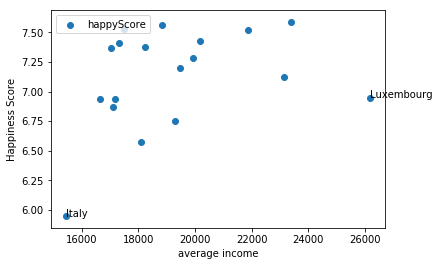

In [26]:
import matplotlib.pyplot as plt

data.sort_values('avg_income', inplace=True) # if True, the data itself is going to be affected, not getting just a copy.

richest = data[ data['avg_income'] >15000 ] #filter

plt.scatter(richest['avg_income'], richest['happyScore']) #x and y

# 3 parameters, x position, y position and text of the label
plt.text(richest.iloc[0]['avg_income'],
         richest.iloc[0]['happyScore'],
         richest.iloc[0]['country'])

plt.text(richest.iloc[-1]['avg_income'],
         richest.iloc[-1]['happyScore'],
         richest.iloc[-1]['country'])

plt.xlabel("average income")
plt.ylabel("Happiness Score")
plt.legend(loc='upper left')

plt.show()

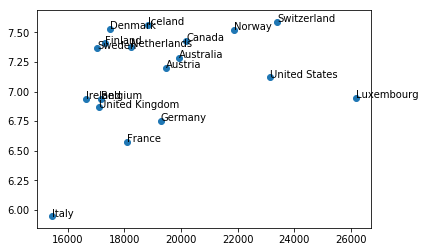

In [34]:
data.sort_values('avg_income', inplace=True) # if True, the data itself is going to be affected, not getting just a copy.
richest = data[ data['avg_income'] >15000 ] #filter
plt.scatter(richest['avg_income'], richest['happyScore']) #x and y
for k,row in richest.iterrows():
    plt.text(row['avg_income'],
             row['happyScore'],
             row['country'])

# Eyeballing the data

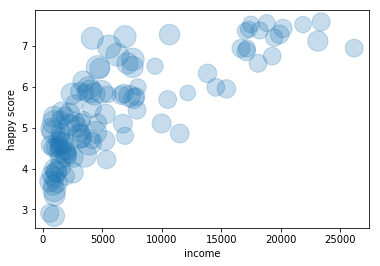

In [55]:
happy = data['happyScore']
income = data['avg_income']

ineq = data['income_inequality']

plt.xlabel('income')
plt.ylabel('happy score')
plt.scatter(income, happy, s = ineq*10, alpha=0.25)
plt.show()

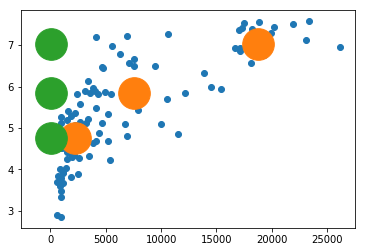

In [83]:
from sklearn.cluster import KMeans
import numpy as np

income_happy = np.column_stack((income, happy))

km_res = KMeans(n_clusters=3).fit(income_happy)

clusters = km_res.cluster_centers_

plt.scatter(income, happy)
plt.scatter(clusters[:,0], clusters[:,1], s=1000)
plt.scatter(clusters[:,1], clusters[:,1], s=1000)

In [82]:
clusters

array([[2.19912121e+03, 4.75472308e+00],
       [1.87593022e+04, 7.03270000e+00],
       [7.57755711e+03, 5.85080769e+00]])